### Instalaremos la libreria yfinance para realizar el analisis

In [1]:
!pip install yfinance

### Cargaremos las librerias necesarias para el proyecto

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

### Definiremos los commodities y descargar datos historicos

In [3]:
tickers = {
    'Oro': 'GC=F',
    'Plata': 'SI=F',
    'Petróleo': 'CL=F',
    'Maíz': 'ZC=F',
    'Trigo': 'ZW=F',
    'Café': 'KC=F',
    'Azúcar': 'SB=F',
    'Algodón': 'CT=F'
}

start_date = '2022-01-01'
end_date = '2024-12-31'

data = {}
for name, ticker in tickers.items():
    df = yf.download(ticker, start=start_date, end=end_date, group_by='column', auto_adjust=False)
    print(f"Columns for {name} ({ticker}): {df.columns}")
    try:
      data[name] = df[('Adj Close', ticker)]
    except:
      print(f"⚠️ Warning: 'Adj Close' not found for {name} ({ticker}). Skipping.")

df_data = pd.DataFrame(data)

[*********************100%***********************]  1 of 1 completed


Columns for Oro (GC=F): MultiIndex([('Adj Close', 'GC=F'),
            (    'Close', 'GC=F'),
            (     'High', 'GC=F'),
            (      'Low', 'GC=F'),
            (     'Open', 'GC=F'),
            (   'Volume', 'GC=F')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for Plata (SI=F): MultiIndex([('Adj Close', 'SI=F'),
            (    'Close', 'SI=F'),
            (     'High', 'SI=F'),
            (      'Low', 'SI=F'),
            (     'Open', 'SI=F'),
            (   'Volume', 'SI=F')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for Petróleo (CL=F): MultiIndex([('Adj Close', 'CL=F'),
            (    'Close', 'CL=F'),
            (     'High', 'CL=F'),
            (      'Low', 'CL=F'),
            (     'Open', 'CL=F'),
            (   'Volume', 'CL=F')],
           names=['Price', 'Ticker'])
Columns for Maíz (ZC=F): MultiIndex([('Adj Close', 'ZC=F'),
            (    'Close', 'ZC=F'),
            (     'High', 'ZC=F'),
            (      'Low', 'ZC=F'),
            (     'Open', 'ZC=F'),
            (   'Volume', 'ZC=F')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Columns for Trigo (ZW=F): MultiIndex([('Adj Close', 'ZW=F'),
            (    'Close', 'ZW=F'),
            (     'High', 'ZW=F'),
            (      'Low', 'ZW=F'),
            (     'Open', 'ZW=F'),
            (   'Volume', 'ZW=F')],
           names=['Price', 'Ticker'])
Columns for Café (KC=F): MultiIndex([('Adj Close', 'KC=F'),
            (    'Close', 'KC=F'),
            (     'High', 'KC=F'),
            (      'Low', 'KC=F'),
            (     'Open', 'KC=F'),
            (   'Volume', 'KC=F')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed


Columns for Azúcar (SB=F): MultiIndex([('Adj Close', 'SB=F'),
            (    'Close', 'SB=F'),
            (     'High', 'SB=F'),
            (      'Low', 'SB=F'),
            (     'Open', 'SB=F'),
            (   'Volume', 'SB=F')],
           names=['Price', 'Ticker'])


[*********************100%***********************]  1 of 1 completed

Columns for Algodón (CT=F): MultiIndex([('Adj Close', 'CT=F'),
            (    'Close', 'CT=F'),
            (     'High', 'CT=F'),
            (      'Low', 'CT=F'),
            (     'Open', 'CT=F'),
            (   'Volume', 'CT=F')],
           names=['Price', 'Ticker'])


### Calculando retornos con las metricas establecidas

/tmp/ipython-input-4-943735864.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_returns = df_data.pct_change().dropna()


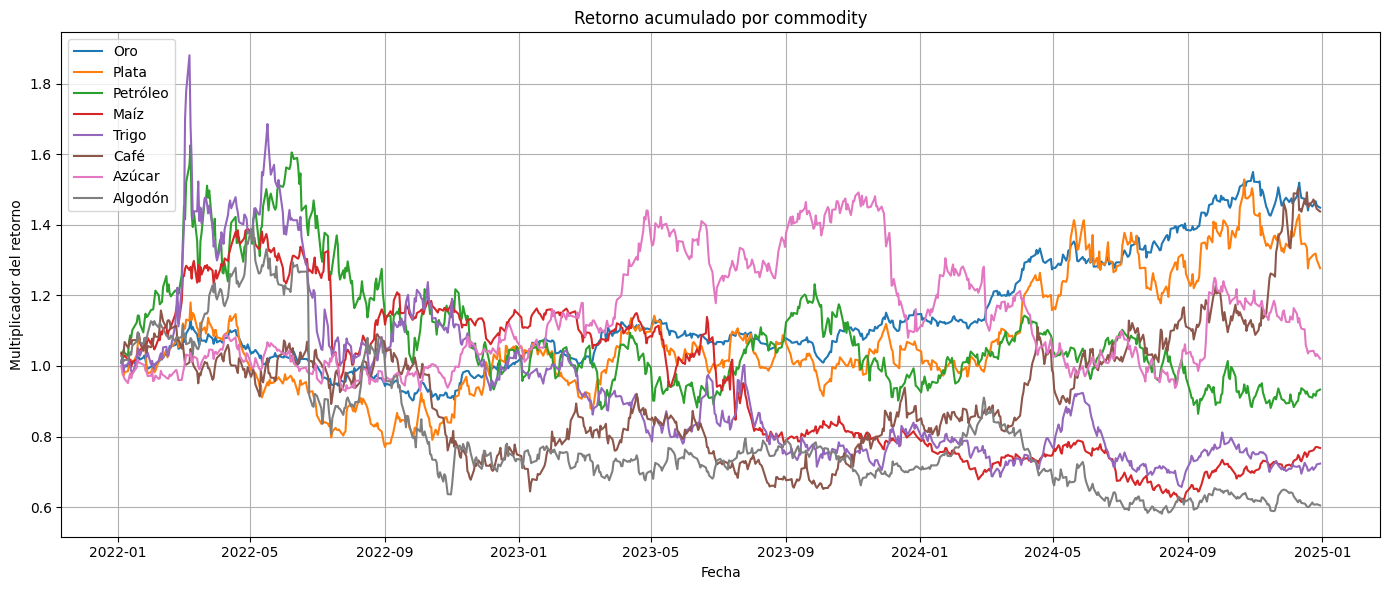

In [4]:
#calculando retorno diario
daily_returns = df_data.pct_change().dropna()
#calculando retorno acumulado
cumulative_returns = (1+daily_returns).cumprod()

#graficando retornos acumulados
plt.figure(figsize=(14,6))
for commodity in cumulative_returns.columns:
  plt.plot(cumulative_returns[commodity], label=commodity)

plt.title("Retorno acumulado por commodity")
plt.xlabel("Fecha")
plt.ylabel("Multiplicador del retorno")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Metricas de rendimiento y simulacion de inversion

In [5]:
#Retorno promedio diario y volatilidad diaria
rendimiento = pd.DataFrame({
    'Retorno Promedio (%)': daily_returns.mean() * 100,
    'Volatilidad (%)': daily_returns.std() * 100,
    'Retorno Anual (%)': daily_returns.mean() * 252 * 100,
    'Volatilidad Anual (%)': daily_returns.std() * np.sqrt(252) * 100
})

#Simulacion de inversion de $10,000
inversion_inicial = 10000
ganancias = cumulative_returns.iloc[-1] * inversion_inicial
ganancias_netas = ganancias - inversion_inicial
rendimiento['Ganancia Neta ($)'] = ganancias_netas

rendimiento.sort_values('Ganancia Neta ($)', ascending=False)

,Retorno Promedio (%),Volatilidad (%),Retorno Anual (%),Volatilidad Anual (%),Ganancia Neta ($)
Oro,0.053481,0.918153,13.477231,14.575226,4483.161400
Café,0.073924,2.269809,18.628961,36.032103,4375.279696
Plata,0.050036,1.875086,12.609166,29.766071,2771.390843
Azúcar,0.017197,1.699410,4.333528,26.977299,208.110669
Petróleo,0.019306,2.382907,4.865183,37.827478,-669.033103
Maíz,-0.019292,1.765580,-4.861592,28.027715,-2324.989393
Trigo,-0.012034,2.510390,-3.032651,39.851213,-2767.150396
Algodón,-0.044042,2.104003,-11.098639,33.400008,-3952.132710


### Visializacion de comparaciones

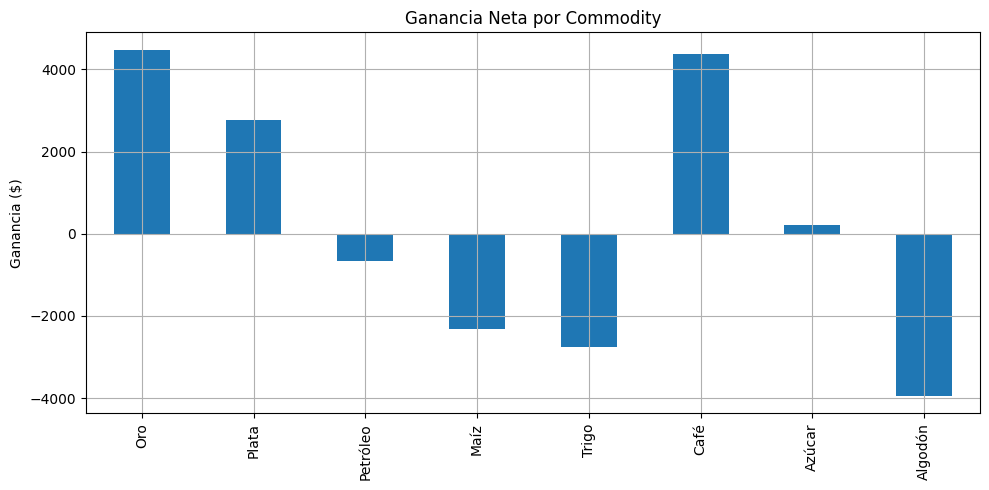

In [6]:
#Comparativa de ganancias netas
rendimiento['Ganancia Neta ($)'].plot(kind='bar', figsize=(10,5), title='Ganancia Neta por Commodity')
plt.ylabel('Ganancia ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Estabilidad e inestabilidad

In [7]:
volatilidad = daily_returns.std().sort_values()
print("Mas estable: ", volatilidad.idxmin())
print("Mas inestable: ", volatilidad.idxmax())

Mas estable:  Oro
Mas inestable:  Trigo


### Analisis por trimestre o semestre

/tmp/ipython-input-8-1232846478.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  trimestral = df_data.resample('Q').last()


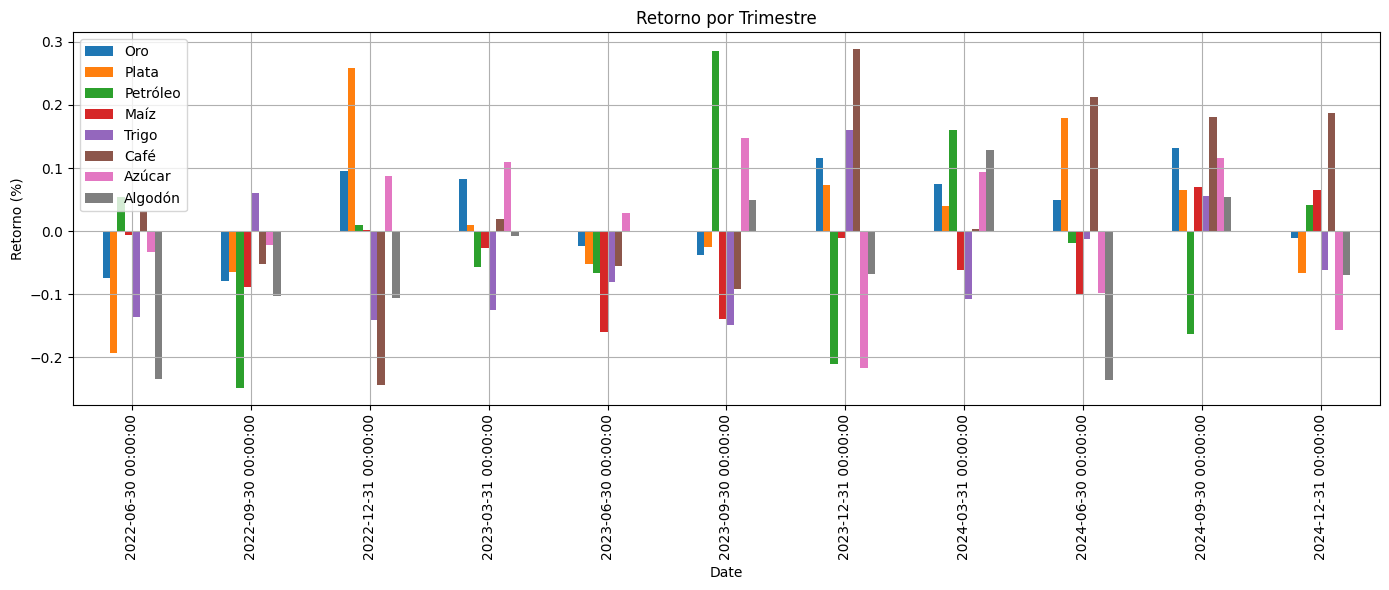

In [8]:
#Agrupacion por trimestres
trimestral = df_data.resample('Q').last()
trimestral_returns = trimestral.pct_change().dropna()

#Visualizacion de rendimiento trimestral
trimestral_returns.plot(kind='bar', figsize=(14,6), title='Retorno por Trimestre')
plt.ylabel('Retorno (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Simulacion de cambio de commodity

In [9]:
threshold = -0.02 #si en caso que el retorno diario baja mas del -2%, cambiamos

acciones = []
for fecha in daily_returns.index:
  retorno_dia = daily_returns.loc[fecha]
  peor = retorno_dia[retorno_dia < threshold]
  if not peor.empty:
    acciones.append((fecha, list(peor.index)))

acciones[:5] #solo mostrara las primeras decisiones de cambio

[(Timestamp('2022-01-05 00:00:00'), ['Azúcar']),
 (Timestamp('2022-01-06 00:00:00'), ['Plata']),
 (Timestamp('2022-01-21 00:00:00'), ['Petróleo', 'Café']),
 (Timestamp('2022-01-24 00:00:00'), ['Plata', 'Petróleo', 'Café']),
 (Timestamp('2022-01-26 00:00:00'), ['Trigo'])]

## Resultados

In [10]:
best_trimesters = trimestral_returns.idxmax()
print("Mejor trimestre por commodity:")
print(best_trimesters)

Mejor trimestre por commodity:
Oro        2024-09-30
Plata      2022-12-31
Petróleo   2023-09-30
Maíz       2024-09-30
Trigo      2023-12-31
Café       2023-12-31
Azúcar     2023-09-30
Algodón    2024-03-31
dtype: datetime64[ns]


## Final

In [11]:
print("RESUMEN FINAL:")
print("Mejor commodity para invertir:", rendimiento['Ganancia Neta ($)'].idxmax())
print("Más estable:", volatilidad.idxmin())
print("Más inestable:", volatilidad.idxmax())
print("Período de mejor rendimiento por commodity:")
print(best_trimesters)

RESUMEN FINAL:
Mejor commodity para invertir: Oro
Más estable: Oro
Más inestable: Trigo
Período de mejor rendimiento por commodity:
Oro        2024-09-30
Plata      2022-12-31
Petróleo   2023-09-30
Maíz       2024-09-30
Trigo      2023-12-31
Café       2023-12-31
Azúcar     2023-09-30
Algodón    2024-03-31
dtype: datetime64[ns]


## Tabla

In [12]:
acciones_df = pd.DataFrame(acciones, columns=['Fecha', 'Commodities a cambiar'])
acciones_df.head(10)

,Fecha,Commodities a cambiar
0,2022-01-05,[Azúcar]
1,2022-01-06,[Plata]
2,2022-01-21,"[Petróleo, Café]"
3,2022-01-24,"[Plata, Petróleo, Café]"
4,2022-01-26,[Trigo]
5,2022-01-27,"[Oro, Plata, Trigo, Café]"
6,2022-01-31,[Trigo]
7,2022-02-02,[Azúcar]
8,2022-02-08,[Petróleo]
9,2022-02-15,"[Plata, Petróleo, Maíz, Trigo]"


## Respuestas

In [20]:
# a. ¿Cuál fue el mejor commodity para invertir?
print("Mejor commodity para invertir:", rendimiento['Ganancia Neta ($)'].idxmax())
print()

# b. ¿Cuál fue el más estable/inestable?
print("Más estable:", volatilidad.idxmin())
print("Más inestable:", volatilidad.idxmax())
print()

# c. ¿En qué períodos se obtuvieron mejores rendimientos?
print("Período de mejor rendimiento por commodity:")
print(best_trimesters)
print()

# d. ¿Cuál fue la mejor estrategia de cambio de commodity y por qué?
print("Mejor estrategia de cambio de comódity:", "Para que en el caso que el retorno diario de un comodity caiga por debajo del -2%, lo que permite la reacción de manera rápida a eventos de alta volatilidad; no obstante hay que tener en cuenta el combinar dicha lógica de promedios para evitar cambios excesivos.")

Mejor commodity para invertir: Oro

Más estable: Oro
Más inestable: Trigo

Período de mejor rendimiento por commodity:
Oro        2024-09-30
Plata      2022-12-31
Petróleo   2023-09-30
Maíz       2024-09-30
Trigo      2023-12-31
Café       2023-12-31
Azúcar     2023-09-30
Algodón    2024-03-31
dtype: datetime64[ns]

Mejor estrategia de cambio de comódity: Para que en el caso que el retorno diario de un comodity caiga por debajo del -2%, lo que permite la reacción de manera rápida a eventos de alta volatilidad; no obstante hay que tener en cuenta el combinar dicha lógica de promedios para evitar cambios excesivos.
